In [38]:
import pandas as pd
import time
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,recall_score,precision_score,roc_auc_score
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegresor
from sklearn.ensemble import RandomForestClassifier  # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier #Adaptive Boost
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boost 
from sklearn.svm import SVC #SVC
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from IPython.display import Image  
from sklearn.tree import export_graphviz
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv(r"C:\Users\kisho\DataScience\Machine Learning\Practice\cat2.csv")

In [40]:
data.head()

,Unnamed: 0,online_booking,mobile_site_booking,Car_Cancellation,from_month,from_datee,weekend,timeOfDay,timeDifference,distance,from_cancel_zone,to_cancel_zone
0,0,0,0,0,1,1,0,6,1,8016,1,1
1,1,0,0,0,1,1,0,2,7,8015,1,1
2,2,0,0,0,1,1,0,6,0,8009,1,1
3,3,0,0,0,1,1,0,1,1,8003,1,0
4,4,0,0,0,1,1,0,2,2,8024,1,1


In [41]:
data = data.drop('Unnamed: 0',axis=1)
data.head(3)

,online_booking,mobile_site_booking,Car_Cancellation,from_month,from_datee,weekend,timeOfDay,timeDifference,distance,from_cancel_zone,to_cancel_zone
0,0,0,0,1,1,0,6,1,8016,1,1
1,0,0,0,1,1,0,2,7,8015,1,1
2,0,0,0,1,1,0,6,0,8009,1,1


In [42]:
data.shape

(34292, 11)

In [43]:
data.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'from_month', 'from_datee', 'weekend', 'timeOfDay', 'timeDifference',
       'distance', 'from_cancel_zone', 'to_cancel_zone'],
      dtype='object')

In [44]:
names =['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'from_month', 'from_datee', 'weekend', 'timeOfDay', 'timeDifference',
       'distance', 'from_cancel_zone', 'to_cancel_zone'],

dx = ['Cancel', 'notCancel']

In [45]:
X = data.loc[:,data.columns!='Car_Cancellation'].values
X

array([[   0,    0,    1, ..., 8016,    1,    1],
       [   0,    0,    1, ..., 8015,    1,    1],
       [   0,    0,    1, ..., 8009,    1,    1],
       ...,
       [   1,    0,   11, ..., 7986,    1,    1],
       [   0,    0,   11, ..., 8008,    1,    1],
       [   0,    1,   11, ..., 8005,    1,    1]], dtype=int64)

In [46]:
y = data.Car_Cancellation.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
print("Shape of features set X: ",X.shape)
print("Shape of target Y: ",y.shape)

Shape of features set X:  (34292, 10)
Shape of target Y:  (34292,)


In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
print("Data of training features: ",x_train.shape)
print("Data of testing features: ",x_test.shape)
print("\n")
print("Data of training target: ",y_train.shape)
print("Data of testing target: ",y_test.shape)

Data of training features:  (24004, 10)
Data of testing features:  (10288, 10)


Data of training target:  (24004,)
Data of testing target:  (10288,)


In [50]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)
x_train

array([[ 1.31915983e+00, -2.26462845e-01, -8.34554842e-01, ...,
         5.60764328e-04,  1.56401644e-01,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01,  1.84158303e-01, ...,
         9.77538848e-01,  1.56401644e-01,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01, -8.34554842e-01, ...,
         8.68985728e-01,  1.56401644e-01,  1.17275296e-01],
       ...,
       [-7.58058258e-01, -2.26462845e-01, -4.94983794e-01, ...,
         4.34773246e-01,  1.56401644e-01,  1.17275296e-01],
       [ 1.31915983e+00, -2.26462845e-01, -1.85326799e+00, ...,
        -3.25098597e-01, -3.80379358e+00,  1.17275296e-01],
       [-7.58058258e-01, -2.26462845e-01,  1.84158303e-01, ...,
         8.68985728e-01,  1.56401644e-01,  1.17275296e-01]])

In [51]:
#Model Logistic Regression
model_logreg = LogisticRegression(random_state = 0)
model_logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [52]:
y_pred = model_logreg.predict(x_test)
y_pred[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
y_test[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
#performance metrics
conf_matrix_Logreg = confusion_matrix(y_test,y_pred)
conf_matrix_Logreg

array([[9409,   49],
       [ 776,   54]], dtype=int64)

<Axes: >

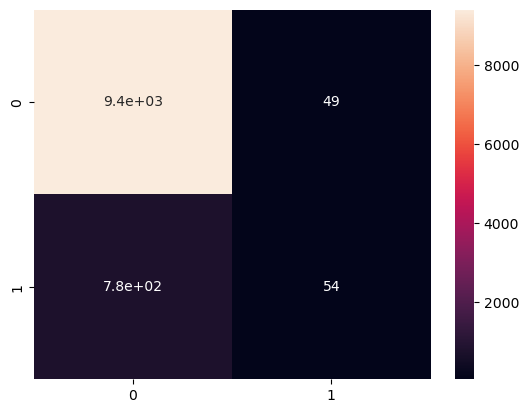

In [55]:
sns.heatmap(conf_matrix_Logreg,annot = True)

In [56]:
accuracy_logreg = metrics.accuracy_score(y_test,y_pred)
accuracy_logreg

0.9198094867807154

In [57]:
precision_logreg = metrics.precision_score(y_test,y_pred)
precision_logreg

0.5242718446601942

In [58]:
recall_logreg = metrics.recall_score(y_test,y_pred)
recall_logreg

0.06506024096385542

In [59]:
#AUC
y_pred_prob = model_logreg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.07406284, 0.13086222, 0.13738121, ..., 0.11159015, 0.06158687,
       0.13278068])

In [60]:
auc_logreg = metrics.roc_auc_score(y_test,y_pred_prob)
auc_logreg

0.7920881665804687

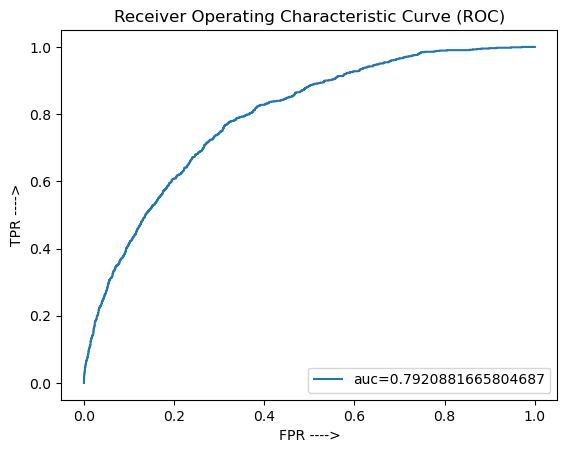

In [61]:
y_pred_proba = model_logreg.predict_proba(x_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [62]:
#Decision Tree
#depth = 2
model_dt2 = DecisionTreeClassifier(random_state = 1, max_depth = 2)
model_dt2.fit(x_train,y_train)
model_dt2_trainscore = model_dt2.score(x_train,y_train)
model_dt2_testscore = model_dt2.score(x_test,y_test)
print('training score :',model_dt2_trainscore)
print('Testing score:' , model_dt2_testscore)

training score : 0.9189718380269954
Testing score: 0.9193234836702955


In [90]:
#depth = 4
model_dt4 = DecisionTreeClassifier(random_state = 1 ,max_depth = 4)
model_dt4.fit(x_train,y_train)
model_dt4_trainscore = model_dt4.score(x_train,y_train)
model_dt4_testscore = model_dt4.score(x_test,y_test)
print('training score:',model_dt4_trainscore)
print('testing  score:',model_dt4_testscore)

training score: 0.9217213797700383
testing  score: 0.9193234836702955


In [94]:
#depth = 6
model_dt6 = DecisionTreeClassifier(random_state = 1, max_depth = 6)
model_dt6.fit(x_train,y_train)
model_dt6_trainscore = model_dt6.score(x_train,y_train)
model_dt6_testscore = model_dt6.score(x_test,y_test)
print('training score:',model_dt6_trainscore)
print('testing score:',model_dt6_testscore)

training score: 0.9248041993001167
testing score: 0.9200038880248833


In [100]:
#depth = 8
model_dt8 = DecisionTreeClassifier(random_state = 1,max_depth = 8)
model_dt8.fit(x_train,y_train)
model_dt8_trainscore = model_dt8.score(x_train,y_train)
modeldt8_testscore = model_dt8.score(x_test,y_test)
print('training score:',model_dt8_trainscore)
print('testing score:',modeldt8_testscore)

training score: 0.9327195467422096
testing score: 0.9182542768273717


In [104]:
#cal entropy
model_dt6 = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy')
model_dt6.fit(x_train,y_train)
y_pred_dt6 = model_dt6.predict(x_test)
y_pred_proba_dt6 = model_dt6.predict_proba(x_test)[:,1]
model_dt6_trainscore = model_dt6.score(x_train,y_train)
model_dt6_testscore = model_dt6.score(x_test,y_test)
print('training score:',model_dt6_trainscore)
print('testing score:',model_dt6_testscore)


training score: 0.9220546575570738
testing score: 0.9203926905132193


In [112]:
y_pred_dt6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
confusion_matrix_dt6 = confusion_matrix(y_test,y_pred_dt6)
confusion_matrix_dt6

array([[9410,   48],
       [ 771,   59]], dtype=int64)

<Axes: >

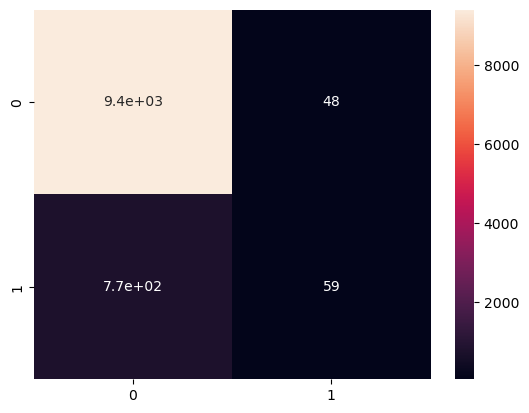

In [134]:
sns.heatmap(confusion_matrix_dt6,annot =True)

In [138]:
#accuracy
accuract_dt6 = metrics.accuracy_score(y_test,y_pred_dt6)
accuract_dt6

0.9203926905132193

In [142]:
#precision
precision_dt6 = metrics.precision_score(y_test,y_pred_dt6)
precision_dt6

0.5514018691588785

In [144]:
#recall
recall_dt6 = metrics.recall_score(y_test,y_pred_dt6)
recall_dt6

0.07108433734939759

In [148]:
auc_dt6 = metrics.roc_auc_score(y_test,y_pred_proba_dt6)
auc_dt6

0.7967727327155949

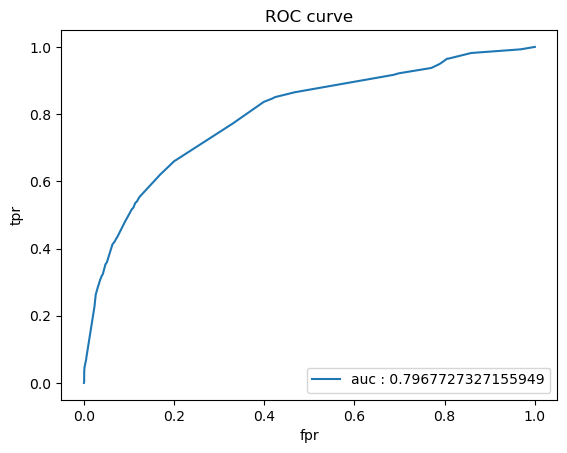

In [162]:
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba_dt6)
plt.plot(fpr,tpr,label = 'auc : '+str(auc_dt6))
plt.legend(loc = 4)
plt.title("ROC curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [ ]:
#Random Forest Classifier
